In [1]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Usar "Shift+Enter" para procesar la información de la celda
#

In [2]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('kino.txt', skiprows=4, sep='\s+')
# "Shift + Enter"

In [3]:
# Lee los primeros 5 renglones del archivo
df0.head()
# "Shift+Enter"

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
0,26/01/2019,13:00,267,285,9.03,20.9,12.5,62,1016.7,0.0,-1.0
1,26/01/2019,14:00,281,282,11.00,16.9,11.9,61,1017.4,0.0,21.7
2,27/01/2019,20:00,243,243,22.02,32.8,22.4,41,1015.5,0.0,761.0
3,27/01/2019,21:00,237,240,19.85,28.4,22.9,40,1014.5,0.0,670.5
4,27/01/2019,22:00,252,260,19.37,29.9,23.7,34,1014.0,0.0,526.8


In [4]:
# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [5]:
# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS            int64
DIRR            int64
VELS          float64
VELR          float64
TEMP          float64
HR              int64
PB            float64
PREC          float64
RADSOL        float64
dtype: object

In [6]:

# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [7]:
df.head()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
0,267,285,9.03,20.9,12.5,62,1016.7,0.0,-1.0,2019-01-26 13:00:00
1,281,282,11.00,16.9,11.9,61,1017.4,0.0,21.7,2019-01-26 14:00:00
2,243,243,22.02,32.8,22.4,41,1015.5,0.0,761.0,2019-01-27 20:00:00
3,237,240,19.85,28.4,22.9,40,1014.5,0.0,670.5,2019-01-27 21:00:00
4,252,260,19.37,29.9,23.7,34,1014.0,0.0,526.8,2019-01-27 22:00:00


In [8]:
# Realiza un análisis exploratorio de datos
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,107.000000,107.000000,107.00000,107.000000,107.000000,107.000000,107.000000,107.0,107.000000
mean,197.336449,194.943925,8.74729,16.963551,15.439252,68.654206,1013.010280,0.0,178.271963
std,97.188297,110.983581,5.32323,7.068151,4.222531,21.886975,1.426761,0.0,256.926808
min,11.000000,1.000000,0.50000,6.100000,5.500000,22.000000,1010.500000,0.0,-1.000000
25%,144.500000,107.000000,4.52000,11.850000,12.000000,55.000000,1012.050000,0.0,-1.000000
50%,193.000000,193.000000,8.11000,15.800000,15.900000,69.000000,1013.100000,0.0,0.000000
75%,271.500000,284.000000,11.38500,19.800000,18.700000,90.500000,1013.800000,0.0,346.900000
max,350.000000,356.000000,23.46000,39.600000,24.000000,98.000000,1017.400000,0.0,761.000000


In [9]:

# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA


In [10]:
# Calcula el promedio de las columnas, excepto en la FECHA (que no tendría sentido)
df.mean()

DIRS       197.336449
DIRR       194.943925
VELS         8.747290
VELR        16.963551
TEMP        15.439252
HR          68.654206
PB        1013.010280
PREC         0.000000
RADSOL     178.271963
dtype: float64

In [11]:
# Calcula el promedio de las Temperaturas
df.TEMP.mean()

15.439252336448597

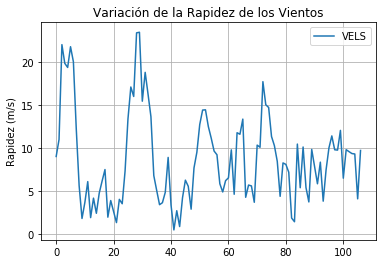

<Figure size 432x288 with 0 Axes>

In [31]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.VELS.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

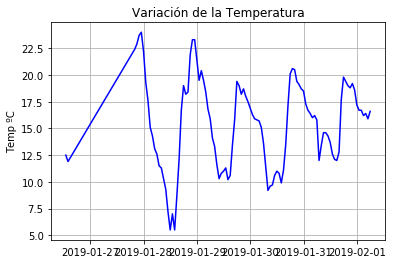

<Figure size 432x288 with 0 Axes>

In [29]:
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()
plt.savefig('sampleFileName.png') 

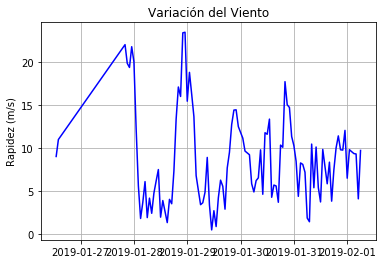

<Figure size 432x288 with 0 Axes>

In [14]:
plt.plot_date(x=df.FECHA, y=df.VELS, fmt="b-")
plt.title("Variación del Viento")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()
plt.savefig("Ejemplo.jpg", bbox_inches='tight')

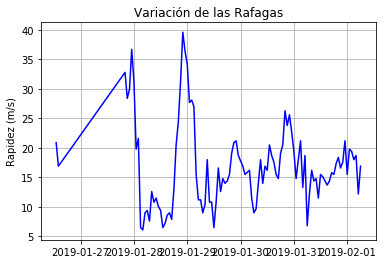

<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot_date(x=df.FECHA, y=df.VELR, fmt="b-")
plt.title("Variación de las Rafagas")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()
plt.savefig("Ejemplo.jpg", bbox_inches='tight')

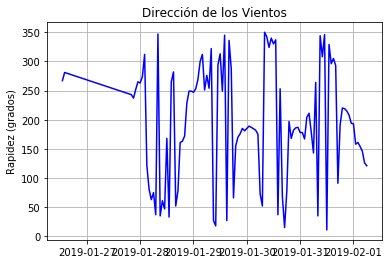

<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot_date(x=df.FECHA, y=df.DIRS, fmt="b-")
plt.title("Dirección de los Vientos")
plt.ylabel("Rapidez (grados)")
plt.grid(True)
plt.show()
plt.savefig("Ejemplo.jpg", bbox_inches='tight')

La gráfica anterior muestra la dirección de los vientos en la localidad de Kino. Donde 360 y 0 representan el norte.
De esta gráfica podemos observar que el viento tiende a tener una dirección de alrededor de 200 grados, es dedir al suroeste. 

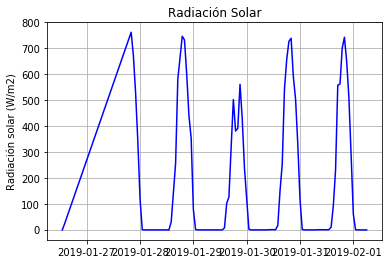

<Figure size 432x288 with 0 Axes>

In [25]:
plt.plot_date(x=df.FECHA, y=df.RADSOL, fmt="b-")
plt.title("Radiación Solar")
plt.ylabel("Radiación solar (W/m2)")
plt.grid(True)
plt.show()

La gráfica anterior muestra la radiación solar en la localidad de Kino. Como se puede observar esta fluctua mayormente entre 750 y 0 vatios por metro cuadrado. Donde el 0 coincide con las noches y el máximo alrededor de las 19 y 20 horas. 

In [21]:
#Lapso de la temperatura diaria
df.TEMP.max()-df.TEMP.min()

18.5

<Figure size 432x288 with 0 Axes>

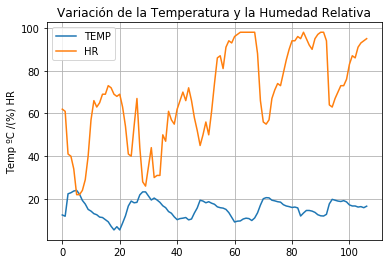

In [33]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
fig=plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()
fig.savefig('plot.png')

Se puede observar que conforme el porcentagede humenada relativo disminuye la temperatura aumenta.

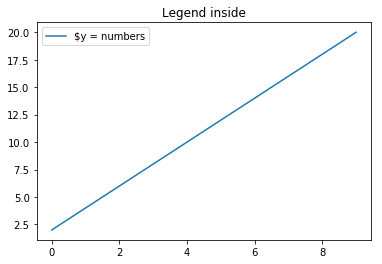

In [32]:
y = [2,4,6,8,10,12,14,16,18,20]
x = np.arange(10)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x, y, label='$y = numbers')
plt.title('Legend inside')
ax.legend()
#plt.show()
 
fig.savefig('plot.png')